# Exploratory Data Analysis

## Project Preparation

* Project telco source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
* Data source: https://github.com/andrewcole33/telco_churn_analysis
* EDA example https://www.kaggle.com/code/redpen12/churn-prediction-in-depth-eda-and-interpretations#Hypothesis-Testing

## Background

Telco adalah sebuah perusahaan telekomunikasi yang menyediakan produk jasa telepon. Pelanggan dari berbagai gender dan usia kami tawarkan berbagai produk, seperti jasa telepon, internet,  streaming, dan lain-lain. Pelanggan dapat berlangganan dalam waktu per bulan, per tahun, atau per dua tahun dengan berbagai macam metode pembayaran.

### Problem Statement

Dengan maraknya kompetisi di industri telekomunikasi, pelanggan pun dapat dengan mudah berhenti menggunakan layanan kami. Untuk itu, perusahaan dapat menggunakan berbagai teknik marketing untuk menggaet dan menjaga pelanggan lama. ????

# Business Questions?
1. Bagaimana proporsi pelanggan churn?
2. Bagaimana distribusi tenure & biaya bulanan?
3. Apakah ada korelasi antara biaya bulanan dan churn?
4. Apakah ada korelasi antara tenure dan biaya bulanan?

## Data Preparation

In [33]:
# Import Library
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [42]:
# Import data dari CSV ke dataframe
df = pd.read_csv('https://raw.githubusercontent.com/andrewcole33/telco_churn_analysis/master/data/churn_data.csv')

## Data Understanding

In [36]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#### Data Description
*   customerID
*   gender: Male, Female
*   SeniorCitizen: 1, 0
*   Partner: ...
* Churn: Yes/No --> Pelanggan yang sudah tidak menggunakan jasanya


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- TotalCharges harusnya menjadi numeric
- SeniorCitizen harusnya categoric

## Data Cleaning

- Remove Duplicate
- Fix structural error (Jakarta, DKI Jakarta, Djakarta)
- Handle missing data --> remove, fill
- Outlier checking --> dibiarkan, ditakeout/diremove, diganti

Other
- Column name
- Data type

In [44]:
## Remove Duplicate

df.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [48]:
df[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [54]:
## Cleaning TotalCharges
## TotalCharges berisi null value atau " "

filter = df['TotalCharges'] == " "  #mencari data dengan TotalCharges yang null

df.loc[filter, 'TotalCharges'] = df['MonthlyCharges'] #Mengisi TotalCharges yang null dengan MonthlyCharges

df['TotalCharges'] = pd.to_numeric(df['TotalCharges']) #Mengubah TotalCharges ke tipe numerik

df[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [55]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [45]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

## Exploratory Data Analysis

In [56]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [59]:
df_sum = df.groupby(['Churn']).agg({
    'customerID': 'count'
}).reset_index()

df_sum['percent'] = 100 * df_sum['customerID'] / df_sum['customerID'].sum()

df_sum

,Churn,customerID,percent
0,No,5174,73.463013
1,Yes,1869,26.536987


Mayoritas pelanggan kita belum Churn 73%, tetapi ada sekitar 27% yang sudah Churn.

### Bagaimana proporsi pelanggan yang Churn?

Text(0.5, 1.0, 'Proporsi pelanggan Churn')

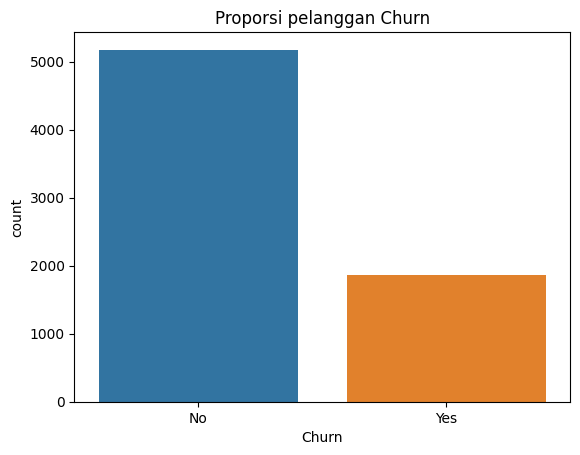

In [60]:
sns.countplot(data=df,
            x='Churn')

plt.title('Proporsi pelanggan Churn')

# Perlu ditambah anotasi jumlah setiap group dan proporsi

Mayoritas pelanggan kita belum Churn 73%, tetapi ada sekitar 27% yang sudah Churn.

### Bagaimana distribusi tenure & biaya bulanan?

Text(0.5, 1.0, 'Distribusi Tenure')

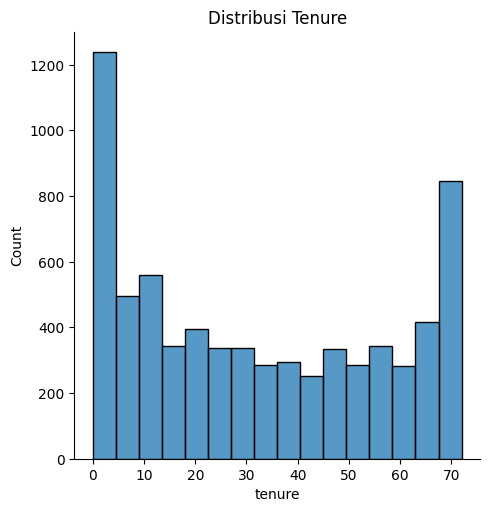

In [61]:
sns.displot(data=df,
            x='tenure')

plt.title('Distribusi Tenure')

Distribusi Tenure pelanggan memiliki puncak di tenure yang rendah (?), dan tenure yang tinggi (>65)

Text(0.5, 1.0, 'Distribusi Tenure per group')

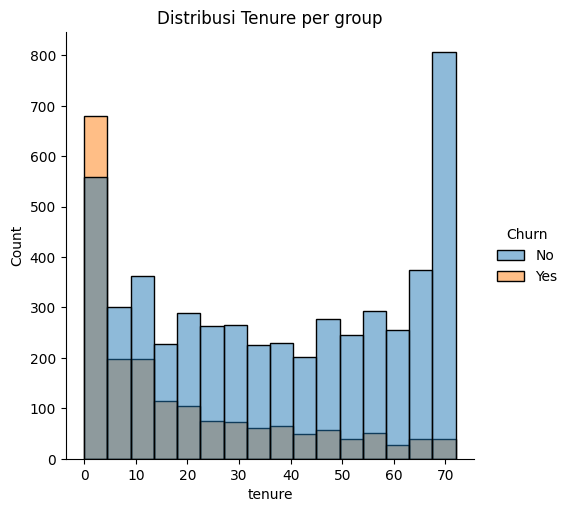

In [62]:
sns.displot(data=df,
            x='tenure',
            hue='Churn')

plt.title('Distribusi Tenure per group')

- Pelanggan yang Churn kebanyakan memiliki tenure yang rendah
- Pelanggan yang tenurenya tinggi cenderung tidak churn.

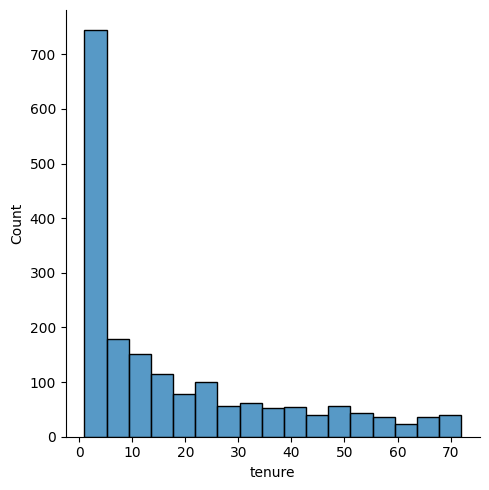

In [64]:
sns.displot(data=df[df['Churn'] == 'Yes'],
            x='tenure')

Text(0.5, 1.0, 'Distribusi Biaya Bulanan')

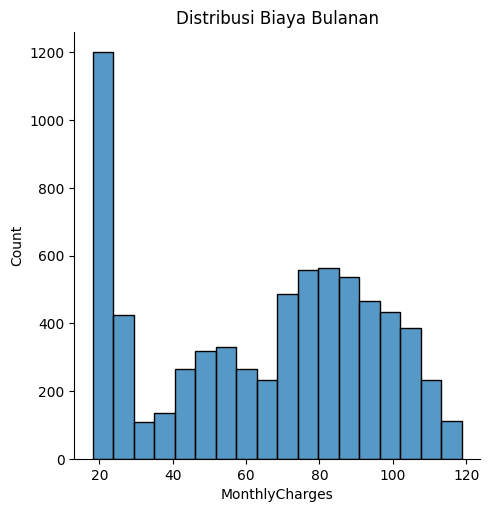

In [65]:
sns.displot(data=df,
            x='MonthlyCharges')

plt.title('Distribusi Biaya Bulanan')

Text(0.5, 1.0, 'Distribusi MonthlyCharges per group')

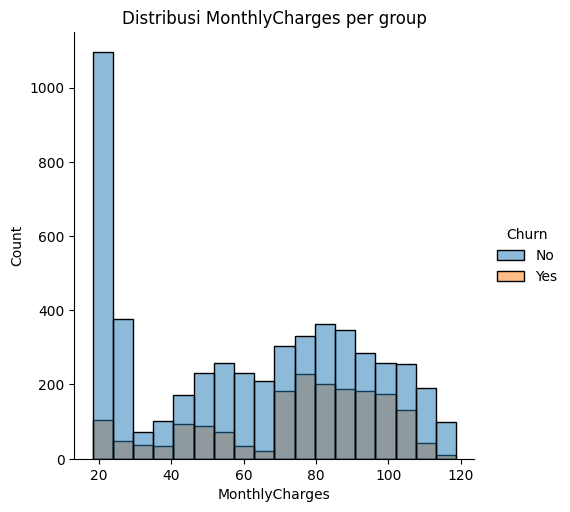

In [66]:
sns.displot(data=df,
            x='MonthlyCharges',
            hue='Churn')

plt.title('Distribusi MonthlyCharges per group')

Text(0.5, 1.0, 'Distribusi MonthlyCharges per group')

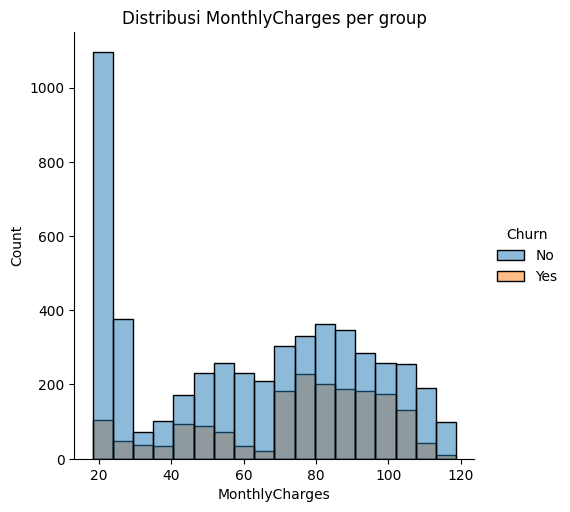

In [67]:
sns.displot(data=df,
            x='MonthlyCharges',
            hue='Churn',
            kind='hist')

plt.title('Distribusi MonthlyCharges per group')

Text(0.5, 1.0, 'Distribusi MonthlyCharges per group')

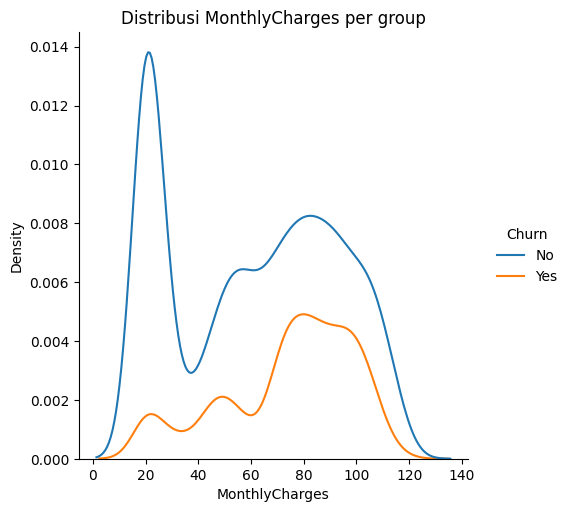

In [68]:
sns.displot(data=df,
            x='MonthlyCharges',
            hue='Churn',
            kind='kde')

plt.title('Distribusi MonthlyCharges per group')

### Apakah ada korelasi antara tenure dan biaya bulanan?

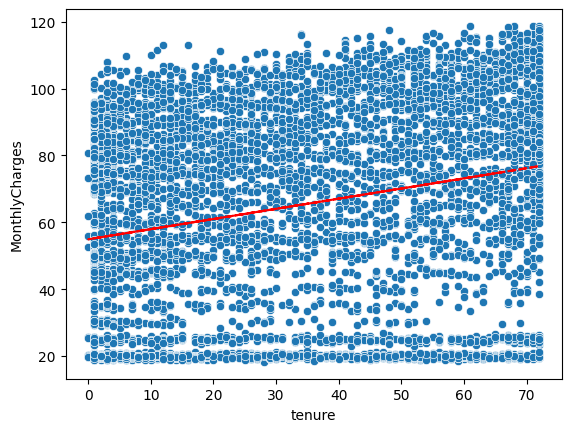

In [74]:
sns.scatterplot(
    data=df,
    x='tenure',
    y='MonthlyCharges'
)

x = df['tenure']
y = df['MonthlyCharges']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

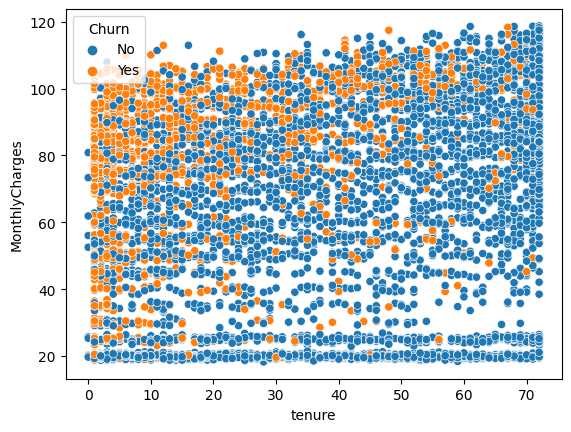

In [70]:
sns.scatterplot(
    data=df,
    x='tenure',
    y='MonthlyCharges',
    hue='Churn'
)

Churn Yes: Tenure rendah & MonthlyCharges tinggi
Churn No: tenure tinggi & Monthlycharges rendah

Asumsi: Apakah Monthlycharges yang tinggi membuat pelanggan churn?

### Bagaimana korelasi antara Tenure Non-Churn dengan ?????

### Lain-lain

<Axes: xlabel='Churn', ylabel='SeniorCitizen'>

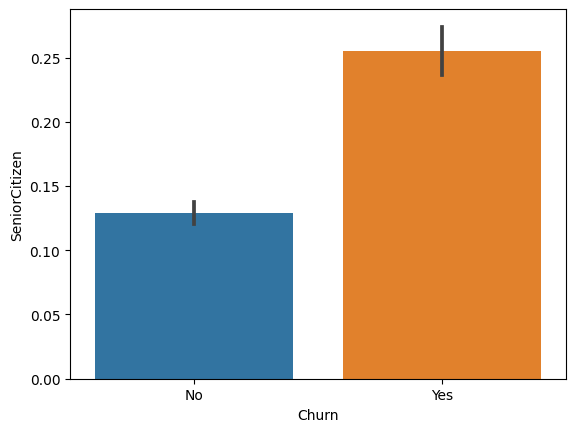

In [29]:
sns.barplot(data=df,
            x='Churn',
            y='SeniorCitizen')

- Tenure tidak berdistribusi normal. Puncaknya ada di tenure < 10 & tenure > 60
-- Segment terbanyak berada di tenure di bawah 1 tahun
-- Segment terbanyak kedua berada di tenure lebih dari 5 tahun

<ipython-input-4-8f978d3c6983>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, bins= 5, label='Male')
<ipython-input-4-8f978d3c6983>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, bins= 5, label='Female')


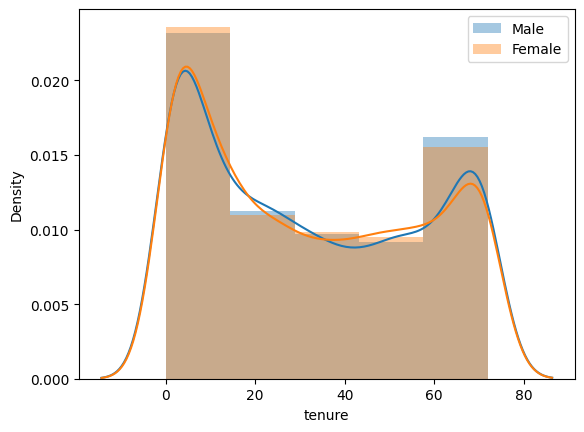

In [4]:
x1 = df[df['gender']=='Male']['tenure']
x2 = df[df['gender']=='Female']['tenure']

sns.distplot(x1, bins= 5, label='Male')
sns.distplot(x2, bins= 5, label='Female')
plt.legend()
plt.show()

<Axes: ylabel='Frequency'>

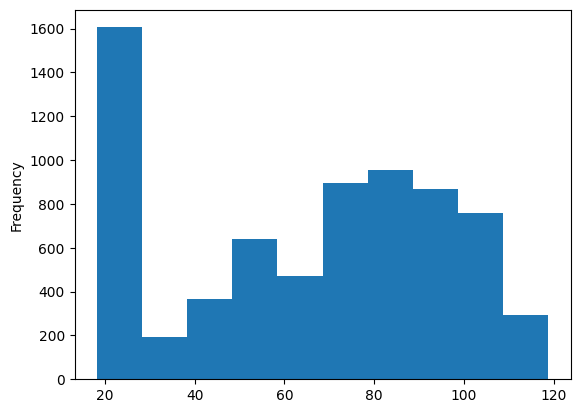

In [51]:
df['MonthlyCharges'].plot(kind='hist')

- Segment MonthlyCharges terbanyak pada Monthlycharges di bawah 40
- Segment Monthly Charges terbanyak kedua pada monthlycharges sekitar 80 - 90

In [52]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

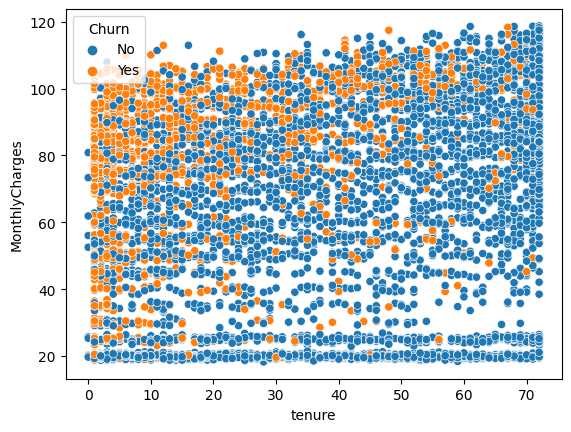

In [54]:
sns.scatterplot(
    data=df,
    x='tenure',
    y='MonthlyCharges',
    hue='Churn'
)

<Axes: xlabel='Churn', ylabel='tenure'>

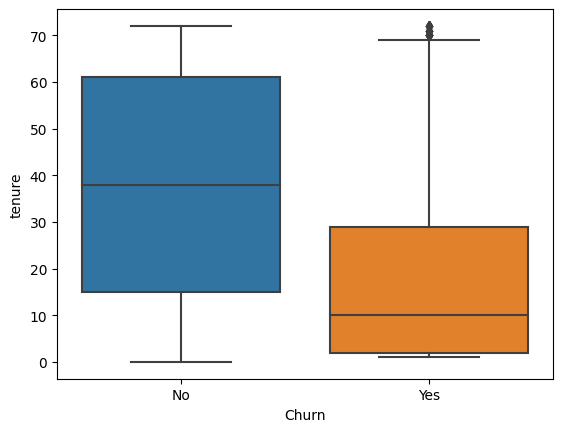

In [55]:
sns.boxplot(data=df, x='Churn', y='tenure')

(Insight)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

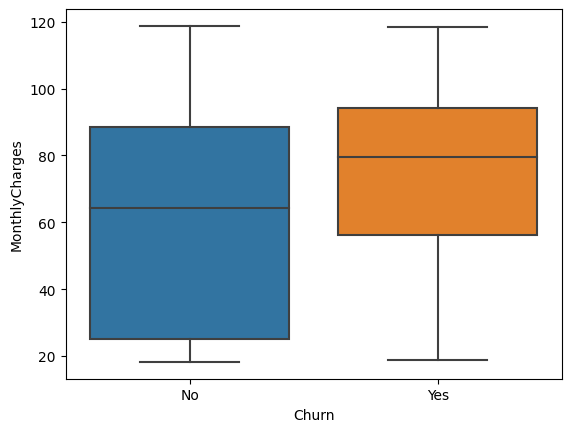

In [56]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')

Customer yang churn cenderung memiliki monthlycharges yang lebih besar dibanding yang tidak Churn